In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Customers.csv', sep=';')
print(df)

      CustomerId  Profit  Recency  Frequency   Monetary  Variance
0              1     187       63          1    2349.06         2
1              2      96       10          6     922.62         4
2              3      47       35          4     881.22         3
3              4     294        5          1    3815.16         2
4              5     732        4         31   41868.11        29
...          ...     ...      ...        ...        ...       ...
1506        1507     174       18          3   15798.92        17
1507        1508     124       28         12    2676.89         7
1508        1509    1543        4         17  109497.54        54
1509        1510     668        1          3   49602.45        17
1510        1511      82       35          4    1047.58         6

[1511 rows x 6 columns]


In [3]:
# checking if there is any missing data
null_data = df[df.isnull().any(axis=1)]
print(null_data)

Empty DataFrame
Columns: [CustomerId, Profit, Recency, Frequency, Monetary, Variance]
Index: []


Text(0.5, 1.0, 'Profit per customer distibution')

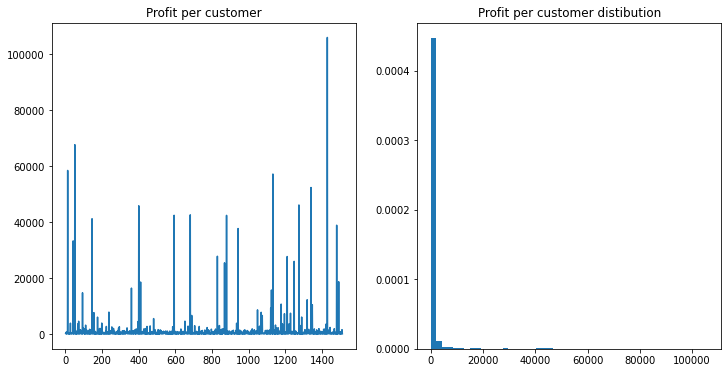

In [4]:
# analyzing distribution, looking for outliers
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

x = df.Profit
ax.plot(df.CustomerId, x)
ax.set_title("Profit per customer")
ax2.hist(x, 50, density=True)
ax2.set_title("Profit per customer distibution")

Text(0.5, 1.0, 'Recency of customers distibution')

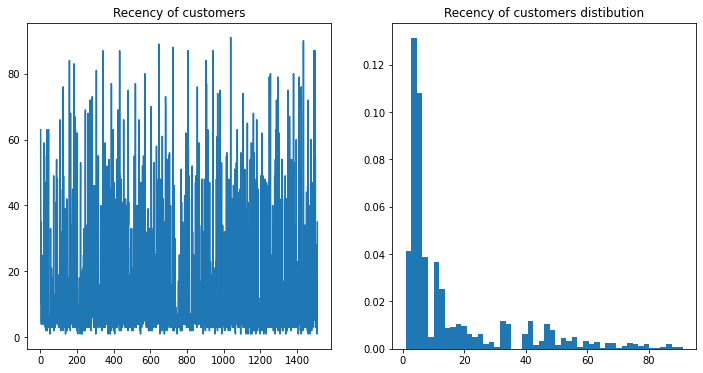

In [5]:
# analyzing distribution, looking for outliers
fig3 = plt.figure(figsize=(12, 6))
ax = fig3.add_subplot(121)
ax2 = fig3.add_subplot(122)

x = df.Recency
ax.plot(df.CustomerId, x)
ax.set_title("Recency of customers")
ax2.hist(x, 50, density=True)
ax2.set_title("Recency of customers distibution")

Text(0.5, 1.0, 'Frequency of customers distibution')

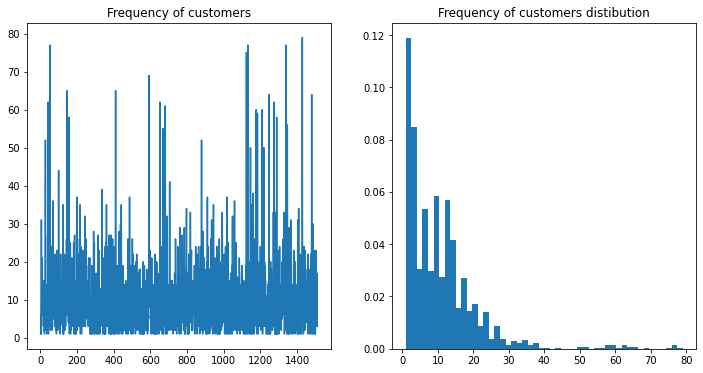

In [6]:
# analyzing distribution, looking for outliers
fig4 = plt.figure(figsize=(12, 6))
ax = fig4.add_subplot(121)
ax2 = fig4.add_subplot(122)

x = df.Frequency
ax.plot(df.CustomerId, x)
ax.set_title("Frequency of customers")
ax2.hist(x, 50, density=True)
ax2.set_title("Frequency of customers distibution")

Text(0.5, 1.0, 'Monetary value per customer distibution')

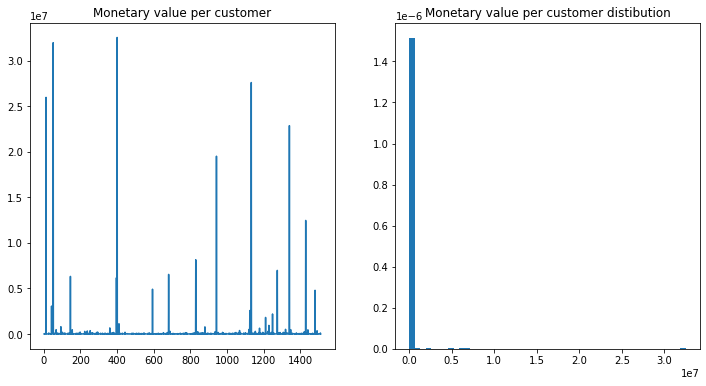

In [7]:
# analyzing distribution, looking for outliers
fig5 = plt.figure(figsize=(12, 6))
ax = fig5.add_subplot(121)
ax2 = fig5.add_subplot(122)

x = df.Monetary
ax.plot(df.CustomerId, x)
ax.set_title("Monetary value per customer")
ax2.hist(x, 50, density=True)
ax2.set_title("Monetary value per customer distibution")

Text(0.5, 1.0, 'Variance of a customer distibution')

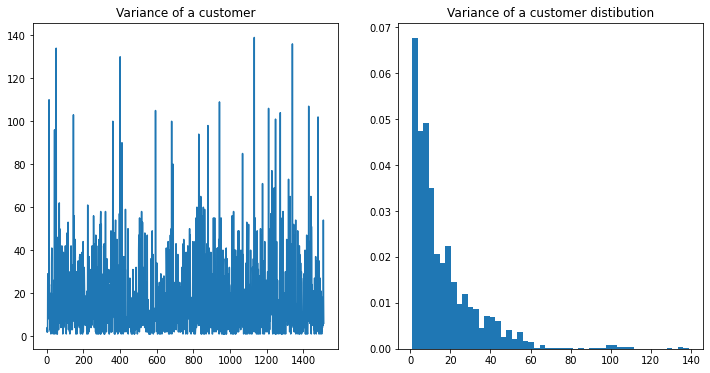

In [8]:
# analyzing distribution, looking for outliers
fig6 = plt.figure(figsize=(12, 6))
ax = fig6.add_subplot(121)
ax2 = fig6.add_subplot(122)

x = df.Variance
ax.plot(df.CustomerId, x)
ax.set_title("Variance of a customer")
ax2.hist(x, 50, density=True)
ax2.set_title("Variance of a customer distibution")

In [9]:
def apply_log1p_transformation(dataframe, column):
    dataframe["log_" + column] = np.log1p(dataframe[column])
    return dataframe["log_" + column]

In [10]:
#df['log_Profit']=
apply_log1p_transformation(df, 'Profit')
#df['log_Recency']=
apply_log1p_transformation(df, 'Recency')
#df['log_Frequency']=
apply_log1p_transformation(df, 'Frequency')
#df['log_Monetary']=
apply_log1p_transformation(df, 'Monetary')
#df['log_Variance']=
apply_log1p_transformation(df, 'Variance')

0       1.098612
1       1.609438
2       1.386294
3       1.098612
4       3.401197
          ...   
1506    2.890372
1507    2.079442
1508    4.007333
1509    2.890372
1510    1.945910
Name: log_Variance, Length: 1511, dtype: float64

In [11]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(init='k-means++', 
                      max_iter=500, 
                      random_state=42)

Text(0.5, 0, 'K values')

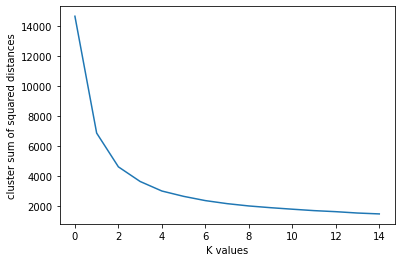

In [12]:
#determining the optimal number of K

def make_list_of_K(K, dataframe):
    cluster_values = list(range(1, K+1))
    inertia_values=[]
    
    for c in cluster_values:
        model = KMeans(
            n_clusters = c, 
            init='k-means++', 
            max_iter=500, 
            random_state=42)
        model.fit(dataframe)
        inertia_values.append(model.inertia_)
    
    return inertia_values

results = make_list_of_K(15, df.iloc[:,6:])

plt.plot(results)
plt.ylabel("cluster sum of squared distances")
plt.xlabel("K values")

In [13]:
# optimal K=4
updated_kmeans_model = KMeans(n_clusters = 4,
                              init='k-means++',
                              max_iter=500,
                              random_state=42)
df['SegmentId'] = updated_kmeans_model.fit_predict(df.iloc[:,6:])

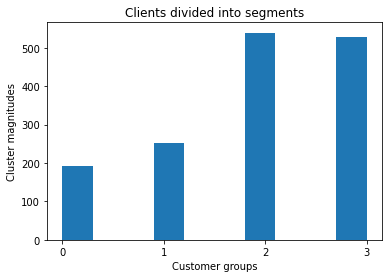

In [14]:
fig7, ax = plt.subplots()
ax.hist(df.SegmentId)
ax.set_title("Clients divided into segments")
ax.set_ylabel("Cluster magnitudes")
ax.set_xlabel("Customer groups")
ax.set_xticks([0,1,2,3])

In [15]:
customers = df[['CustomerId', 'Profit', 'Recency', 'Frequency', 'Monetary', 'Variance', 'SegmentId']].copy()
print(customers)

      CustomerId  Profit  Recency  Frequency   Monetary  Variance  SegmentId
0              1     187       63          1    2349.06         2          2
1              2      96       10          6     922.62         4          2
2              3      47       35          4     881.22         3          1
3              4     294        5          1    3815.16         2          2
4              5     732        4         31   41868.11        29          3
...          ...     ...      ...        ...        ...       ...        ...
1506        1507     174       18          3   15798.92        17          3
1507        1508     124       28         12    2676.89         7          2
1508        1509    1543        4         17  109497.54        54          0
1509        1510     668        1          3   49602.45        17          3
1510        1511      82       35          4    1047.58         6          2

[1511 rows x 7 columns]


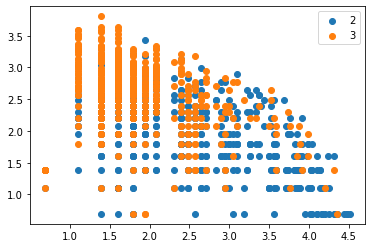

In [16]:
#made this function to analyze the segments using scatter plots
def make_scatter (x, y, SegmentId, number):
    dataframe = pd.DataFrame({'x':x, 'y':y, 'segmentid':SegmentId})
    new = dataframe.loc[dataframe['segmentid']==number]
    plt.scatter(new.x, new.y, label=str(number))
    plt.legend()

#make_scatter(df.log_Recency, df.log_Frequency, df.SegmentId, 0) #low recency, high frequency
#make_scatter(df.log_Recency, df.log_Frequency, df.SegmentId, 1) #high recency, low frequency
make_scatter(df.log_Recency, df.log_Frequency, df.SegmentId, 2) #medium-high recency, medium frequency 
make_scatter(df.log_Recency, df.log_Frequency, df.SegmentId, 3) #low recency, hight frequency

#make_scatter(df.log_Profit, df.log_Monetary, df.SegmentId, 0) #order of profit/monetary: 1 (highest)
#make_scatter(df.log_Profit, df.log_Monetary, df.SegmentId, 1) #4 (lowest)
#make_scatter(df.log_Profit, df.log_Monetary, df.SegmentId, 2) #3
#make_scatter(df.log_Profit, df.log_Monetary, df.SegmentId, 3) #2

#make_scatter(df.log_Frequency, df.log_Variance, df.SegmentId, 0) #high frequency, high variance
#make_scatter(df.log_Frequency, df.log_Variance, df.SegmentId, 1) #low frequency, low variance
#make_scatter(df.log_Frequency, df.log_Variance, df.SegmentId, 2) #medium-low frequency, medium-low variance
#make_scatter(df.log_Frequency, df.log_Variance, df.SegmentId, 3) #medium-high freqency, medium high variance

### Segments description:

#### - segment 0: low recency, high frequency, high profit/monetary, high variance
This is a group of customers who are active and order very frequently. They are very profitable and order a variety of objects.
name: highly active customer

#### - segment 1: high recency, low frequency, low profit/monetary, low variance
This is a group of inactive customers, who placed a small amount of orders a long time ago.
name: inactive customer

#### - segment 2: medium-high recency, medium frequency, medium-low profit/monetary, medium-low variance
This is a group of customers who order ocassionally. Average profit and variance.
name: leaving customer

#### - segment 3: medium-low recency, medium-high frequency, medium-high monetary, medium-high variance
This is a group of customers who are active and order fairly frequently. They are quite profitable and order a variety of objects.
name: active customer

In [17]:
def assign_segment_name(dataframe):
    arr = []
    seg_0 = 'highly active customer'
    seg_1 = 'inactive customer'
    seg_2 = 'leaving customer'
    seg_3 = 'active customer'
    for i in dataframe.SegmentId:
        if (i==0):
            arr.append(seg_0)
        elif (i==1):
            arr.append(seg_1)
        elif (i==2):
            arr.append(seg_2)
        else:
            arr.append(seg_3)
    return(arr)

customers['SegmentName'] = assign_segment_name(df)
print (customers)
customers.to_csv('Customers_new.csv')

      CustomerId  Profit  Recency  Frequency   Monetary  Variance  SegmentId  \
0              1     187       63          1    2349.06         2          2   
1              2      96       10          6     922.62         4          2   
2              3      47       35          4     881.22         3          1   
3              4     294        5          1    3815.16         2          2   
4              5     732        4         31   41868.11        29          3   
...          ...     ...      ...        ...        ...       ...        ...   
1506        1507     174       18          3   15798.92        17          3   
1507        1508     124       28         12    2676.89         7          2   
1508        1509    1543        4         17  109497.54        54          0   
1509        1510     668        1          3   49602.45        17          3   
1510        1511      82       35          4    1047.58         6          2   

                 SegmentName  
0       